# Assignment 1: Computational Finance

In [61]:
# Imports
import datetime
import math as m
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [62]:
ticker = "AAPL"
start_date = "2010-01-01"
end_date = datetime.datetime.now().strftime("%Y-%m-%d")

data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


Historical Estimators

In [63]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440332,6.455078,6.391279,6.422878,493729600
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2010-01-06,6.348847,6.477046,6.342226,6.451466,552160000
2010-01-07,6.337110,6.379844,6.291067,6.372320,477131200
2010-01-08,6.379241,6.379843,6.291368,6.328683,447610800


In [64]:
mean_close = data['Close'].mean()
vol = data['Close'].std()
print(mean_close, vol)

Ticker
AAPL    70.521591
dtype: float64 Ticker
AAPL    68.503934
dtype: float64


In [65]:
import numpy as np # for the np.sqrt

In [66]:
T = len(data)
print(T)

3847


The formula is wrong on the Lab Assignment (added T)

In [67]:
def sigma_parkinson_estimator(_high, _low, _open, _close, T):
    return np.sqrt(
        1/(4*np.log(2)*T)*np.sum(np.log(_high/_low)**2)
        )

In [68]:
def sigma_garman_klass_estimator(_high, _low, _open, _close, T):
    return np.sqrt(
        (1/(2*T))*np.sum(np.log(_high/_low)**2) - 
        ((2*np.log(2)-1)/T) * np.sum((np.log(_close/_open))**2)
        )

In [69]:
rollingT = 30
sigma_gk = [
    sigma_garman_klass_estimator(
        data.iloc[t:t+rollingT]["High"].to_numpy(),
        data.iloc[t:t+rollingT]["Low"].to_numpy(),
        data.iloc[t:t+rollingT]["Open"].to_numpy(),
        data.iloc[t:t+rollingT]["Close"].to_numpy(),
        rollingT
    )
    for t in range(len(data) - rollingT + 1)
]


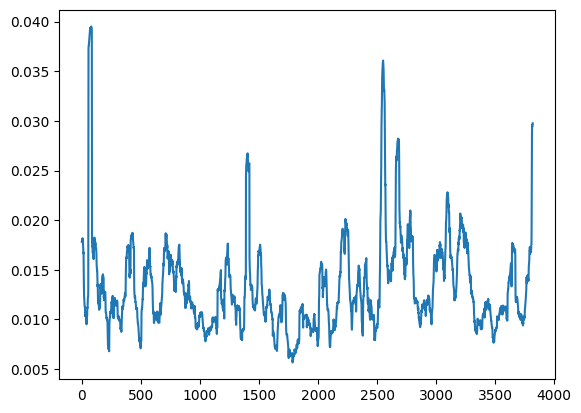

In [70]:
import matplotlib.pyplot as plt

plt.plot(sigma_gk)
plt.show()

In [71]:
sigma_p = [
    sigma_parkinson_estimator(
        data.iloc[t:t+rollingT]["High"].to_numpy(),
        data.iloc[t:t+rollingT]["Low"].to_numpy(),
        data.iloc[t:t+rollingT]["Open"].to_numpy(),
        data.iloc[t:t+rollingT]["Close"].to_numpy(),
        rollingT
    )
    for t in range(len(data) - rollingT + 1)
]

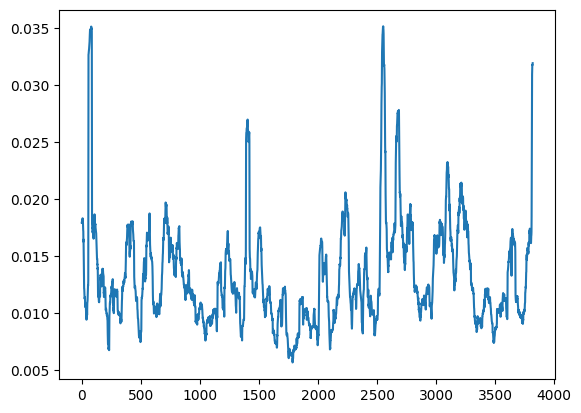

In [72]:
import matplotlib.pyplot as plt

plt.plot(sigma_p)
plt.show()

In [73]:
import pandas as pd
from skfolio.datasets import load_sp500_dataset, load_sp500_implied_vol_dataset
from skfolio.preprocessing import prices_to_returns
prices = load_sp500_dataset()
implied_vol = load_sp500_implied_vol_dataset()
X = prices_to_returns(prices)
X = X.loc["2010":]
implied_vol.tail()

,AAPL,AMD,BAC,BBY,CVX,GE,HD,JNJ,JPM,KO,LLY,MRK,MSFT,PEP,PFE,PG,RRC,UNH,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,
2022-12-21,0.343749,0.512436,0.314423,0.410686,0.301621,0.337233,0.291449,0.169588,0.276606,0.178861,0.287204,0.220556,0.312139,0.186306,0.258662,0.191366,0.557777,0.244674,0.219240,0.306320
2022-12-22,0.357983,0.541554,0.323598,0.418840,0.317364,0.352863,0.304409,0.182946,0.290541,0.188259,0.289049,0.226861,0.327944,0.194996,0.262856,0.196550,0.575974,0.251015,0.226632,0.319773
2022-12-23,0.354818,0.531073,0.316493,0.400008,0.304423,0.348108,0.295155,0.174784,0.283626,0.182933,0.285319,0.218791,0.323790,0.189222,0.256927,0.193781,0.563745,0.246426,0.219599,0.306954
2022-12-27,0.366786,0.545771,0.318301,0.405272,0.307501,0.355508,0.301645,0.180025,0.286293,0.184747,0.295695,0.225937,0.334950,0.190844,0.265863,0.197682,0.570953,0.254200,0.225493,0.311402
2022-12-28,0.388422,0.549840,0.322165,0.429541,0.315993,0.364447,0.308722,0.179856,0.295815,0.192887,0.295466,0.228423,0.340077,0.196283,0.267425,0.208188,0.581149,0.253623,0.236076,0.323964


In [74]:
import yfinance as yf
import datetime
import math 
spx_symbol = "^SPX"
today = "2025-04-18"
end_date = datetime.datetime.strptime(today, "%Y-%m-%d")
start_date = end_date - datetime.timedelta(days=365)

spx_data = yf.download(spx_symbol, start=start_date, end=end_date)
lastBusDay = spx_data.index[-1]
vix_data = yf.download("^VIX", start=lastBusDay, end = lastBusDay + datetime.timedelta(days=1))
S0 = float(spx_data["Close"].iloc[-1]) 
r = 0.02  #fixed
F0 = S0*math.exp(r * T)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\andre\AppData\Local\Temp\ipykernel_22920\4122723492.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(spx_data["Close"].iloc[-1])


b) and c) We compute the estimated VIX and we compare it with the CBOE-quoted VIX

In [75]:
import yfinance as yf
from datetime import datetime, timedelta
import re

def get_dte30(nearest_friday=False):
    FRIDAY = 4
    DTE_30 = 30
    today = datetime.today().date()

    t = today + timedelta(days=DTE_30)
    if nearest_friday:
        inc = 1 if t.weekday() < FRIDAY else -1
        while t.weekday() != FRIDAY:
            t += timedelta(days=inc)
        return t.strftime("%Y-%m-%d")
    
    while t.weekday() > FRIDAY:
        t += timedelta(days=1)

    return t.strftime("%Y-%m-%d")
def set_time_to_expiry_column(option_chain):
    def extract_expiration_from_symbol(contract_symbol):
        match = re.search(r'(\d{6})', contract_symbol)
        if match:
            date_part = match.group(1)
            expiration_date = datetime.strptime(date_part, "%y%m%d").date()
            return expiration_date
    option_chain["expiry"] = option_chain["contractSymbol"].apply(extract_expiration_from_symbol)
    option_chain["expiry"] = pd.to_datetime(option_chain["expiry"])
    option_chain["T"] = (option_chain["expiry"] - pd.Timestamp.today().normalize()).dt.days / 365

def vix_t(option_chain, stock_price, risk_free_rate=0.02):
    """
    Compute the VIX index using CBOE's methodology.
    Parameters:
    - option_chain: DataFrame with 'strike', 'bid', 'ask', 'type' (call/put), 'T' (time to expiration in years)
    - spx_price: Current S&P 500 index price
    - risk_free_rate: Annualized risk-free rate (decimal)
    Returns:
    - VIX index (annualized implied volatility in %)
    """
    # Calculate Forward Price F
    option_chain['mid_price'] = (option_chain['bid'] + option_chain['ask']) / 2

    F = stock_price * np.exp(risk_free_rate* option_chain['T'].iloc[0])


    # Identify Out of the Money Options
    option_chain['OTM'] = ((option_chain['type'] == 'call') & (option_chain['strike'] > F)) | \
                          ((option_chain['type'] == 'put') & (option_chain['strike'] < F))
    otm_options = option_chain[option_chain['OTM']]
    otm_options = otm_options.sort_values(by=['strike'])

    # Compute \(\Delta K_i\) (Strike Intervals)
    otm_options['dK'] = otm_options['strike'].diff().bfill()

    # Compute Weights for Each Option
    otm_options['weight'] = (otm_options['dK'] / otm_options['strike']**2)*np.exp(risk_free_rate * otm_options['T'])


    
    # Compute Variance Swap Estimate
    variance = (2 / otm_options['T'].iloc[0])* (otm_options['weight'] * otm_options['mid_price']).sum()

    # Final Adjustment
    K0 = otm_options.iloc[(otm_options['strike'] - F).abs().argmin()]['strike']
    term_adjustment = ((F / K0) - 1) ** 2 / otm_options['T'].iloc[0]
    variance -= term_adjustment

    # Compute VIX in Annualized Form
    vix = np.sqrt(variance) * 100

    return vix

spx_ticket = yf.Ticker("^SPX")
tau = 30 # according to CBOE
expiry_date = get_dte30()
# For it to be a valid Maturity date T
try:
    spx_ticket.option_chain(date = expiry_date)
except ValueError:
    expiry = get_dte30(nearest_friday=True)



calls = spx_ticket.option_chain(date = expiry_date).calls
calls['type'] = 'call'
puts = spx_ticket.option_chain(date = expiry_date).puts
puts['type'] = 'put'

option_chain = pd.concat([calls,puts])

set_time_to_expiry_column(option_chain)


spx_ticker_candle = spx_ticket.history().iloc[-1]

IV = vix_t(option_chain, spx_ticker_candle.Close)
print(IV)

print(vix_data.Close.to_numpy()[0])

30.03287262556923
[29.64999962]


d) We now plot the historical estimated realized variances from Step 3 along with the VIX time series (from what datetimes though?)

In [76]:
# Now we plot the historical estimated realized variances
rollingT = 30
data = spx_data
rollingT = 30
sigma_gk = [
    sigma_garman_klass_estimator(
        data.iloc[t:t+rollingT]["High"].to_numpy(),
        data.iloc[t:t+rollingT]["Low"].to_numpy(),
        data.iloc[t:t+rollingT]["Open"].to_numpy(),
        data.iloc[t:t+rollingT]["Close"].to_numpy(),
        rollingT
    )
    for t in range(len(data) - rollingT + 1)
]


sigma_p = [
    sigma_parkinson_estimator(
        data.iloc[t:t+rollingT]["High"].to_numpy(),
        data.iloc[t:t+rollingT]["Low"].to_numpy(),
        data.iloc[t:t+rollingT]["Open"].to_numpy(),
        data.iloc[t:t+rollingT]["Close"].to_numpy(),
        rollingT
    )
    for t in range(len(data) - rollingT + 1)
]
# we download the VIX from the same start and end dates as the SPX data
data_vix = yf.download("^VIX", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


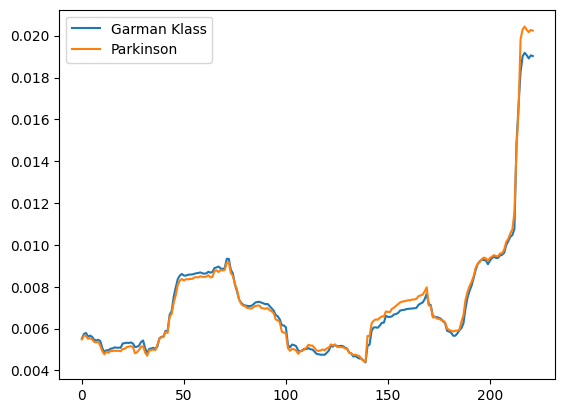

In [77]:

plt.plot(sigma_gk, label='Garman Klass')
plt.plot(sigma_p, label='Parkinson')
plt.legend()
plt.show()

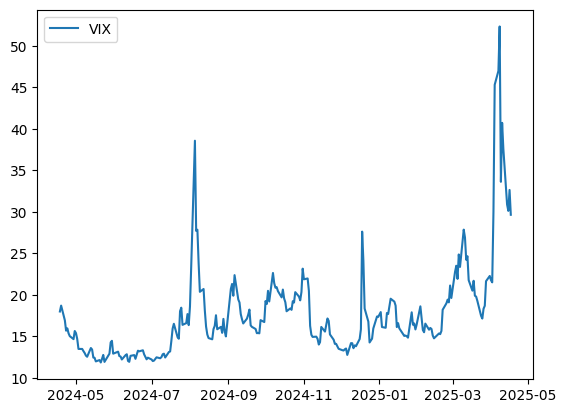

In [78]:
plt.plot(data_vix.Close, label='VIX')
plt.legend()
plt.show()

Now we perform statistical analyses to assess the relationship between the time series

In [79]:
len(sigma_gk), len(sigma_p), len(np.ravel(data_vix.Close)[29:])

(222, 222, 222)

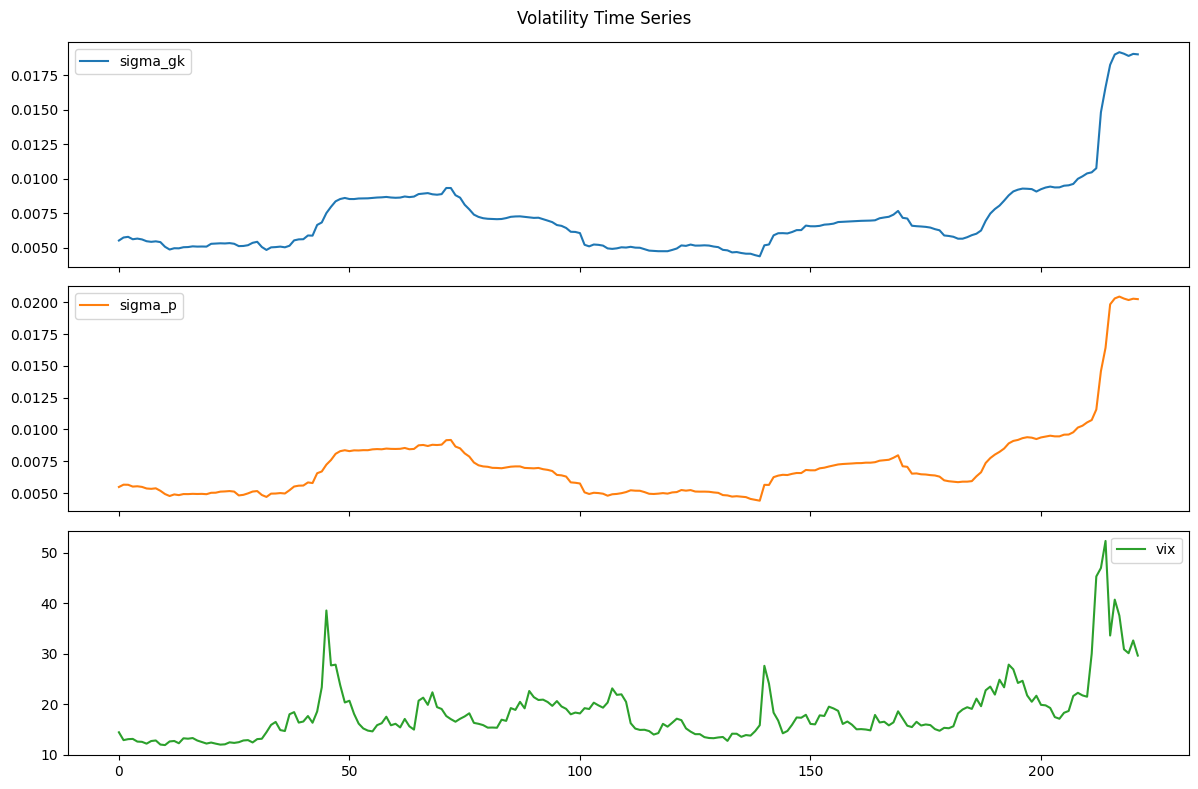

In [80]:
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, ccf
from statsmodels.api import OLS, add_constant
from scipy.stats import pearsonr, spearmanr
vix_path = np.ravel(data_vix.Close)[29:]
time_series_data = pd.DataFrame({
    'sigma_gk': sigma_gk,
    'sigma_p': sigma_p,
    'vix': vix_path
})
time_series_data.plot(subplots=True, figsize=(12, 8), title="Volatility Time Series")
plt.tight_layout()
plt.show()

In [81]:
print("Pearson Correlation:\n", time_series_data.corr(method='pearson'))
print("\nSpearman Correlation:\n", time_series_data.corr(method='spearman'))


Pearson Correlation:
           sigma_gk   sigma_p       vix
sigma_gk  1.000000  0.996212  0.726856
sigma_p   0.996212  1.000000  0.723949
vix       0.726856  0.723949  1.000000

Spearman Correlation:
           sigma_gk   sigma_p       vix
sigma_gk  1.000000  0.982987  0.606938
sigma_p   0.982987  1.000000  0.621646
vix       0.606938  0.621646  1.000000


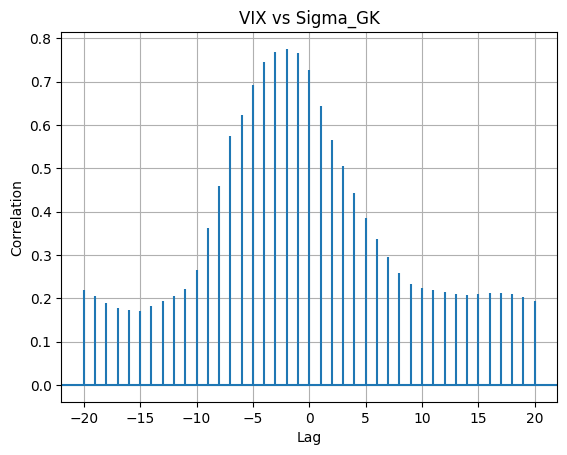

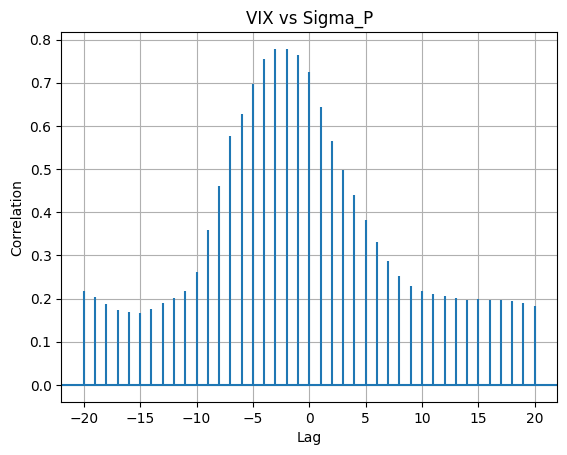

In [82]:
# Cross-correlation between VIX and sigma_gk/p
def plot_ccf(x, y, lags=20, title="Cross-Correlation"):
    plt.xcorr(x - np.mean(x), y - np.mean(y), maxlags=lags)
    plt.title(title)
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.grid(True)
    plt.show()

plot_ccf(time_series_data['vix'], time_series_data['sigma_gk'], title='VIX vs Sigma_GK')
plot_ccf(time_series_data['vix'], time_series_data['sigma_p'], title='VIX vs Sigma_P')


In [83]:
# Simple linear regression
X = add_constant(time_series_data[['sigma_gk', 'sigma_p']])
y = time_series_data['vix']
model = OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    vix   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     122.7
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           1.84e-36
Time:                        07:58:27   Log-Likelihood:                -627.25
No. Observations:                 222   AIC:                             1261.
Df Residuals:                     219   BIC:                             1271.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1276      0.866      8.228      0.0

In [84]:
for col in time_series_data.columns:
    result = adfuller(time_series_data[col])
    print(f"\nADF Test for {col}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")



ADF Test for sigma_gk:
ADF Statistic: 0.1461
p-value: 0.9691

ADF Test for sigma_p:
ADF Statistic: 0.5106
p-value: 0.9852

ADF Test for vix:
ADF Statistic: -3.3647
p-value: 0.0122


In [85]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(time_series_data[['vix', 'sigma_gk']], maxlag=5, verbose=True)
grangercausalitytests(time_series_data[['vix', 'sigma_p']], maxlag=5, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8557  , p=0.1745  , df_denom=218, df_num=1
ssr based chi2 test:   chi2=1.8812  , p=0.1702  , df=1
likelihood ratio test: chi2=1.8732  , p=0.1711  , df=1
parameter F test:         F=1.8557  , p=0.1745  , df_denom=218, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0155  , p=0.1358  , df_denom=215, df_num=2
ssr based chi2 test:   chi2=4.1247  , p=0.1272  , df=2
likelihood ratio test: chi2=4.0865  , p=0.1296  , df=2
parameter F test:         F=2.0155  , p=0.1358  , df_denom=215, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.6964  , p=0.0002  , df_denom=212, df_num=3
ssr based chi2 test:   chi2=20.7525 , p=0.0001  , df=3
likelihood ratio test: chi2=19.8273 , p=0.0002  , df=3
parameter F test:         F=6.6964  , p=0.0002  , df_denom=212, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.0563  , p=0.0000  

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (2.315551811720504, 0.12953500063027065, 218.0, 1),
   'ssr_chi2test': (2.3474172036249144, 0.1254907713115967, 1),
   'lrtest': (2.3350378919687955, 0.12649191246077177, 1),
   'params_ftest': (2.3155518117204417, 0.12953500063027604, 218.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.710340408747424, 0.02604978366617219, 215.0, 2),
   'ssr_chi2test': (7.5932547899947265, 0.0224463470041661, 2),
   'lrtest': (7.465154226821596, 0.023931083183684032, 2),
   'params_ftest': (3.7103404087474545, 0.02604978366617169, 215.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (4.522526338252278, 0.004259296513432054, 212.0, 3),
   'ssr_chi2test': (14.01556511430069, 0.0028840423639021526, 3),
   'lrtest': (13.585341883817819, 0.0035275171529615154, 3),
   'params_ftest': (4.522526338252249, 0.0042592965134321745, 212.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [

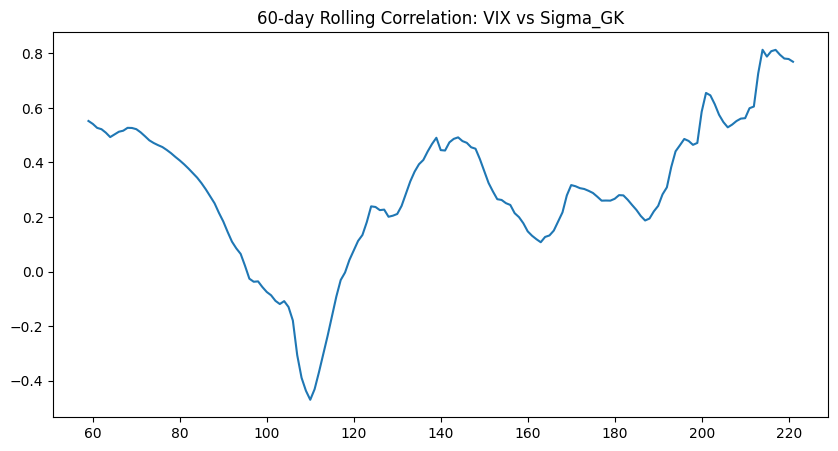

In [86]:
rolling_corr = time_series_data['vix'].rolling(60).corr(time_series_data['sigma_gk'])
rolling_corr.plot(title='60-day Rolling Correlation: VIX vs Sigma_GK', figsize=(10, 5))
plt.show()


In [87]:
spx_data.head()

Price,Close,High,Low,Open,Volume
Ticker,^SPX,^SPX,^SPX,^SPX,^SPX
Date,,,,,
2024-04-18,5011.120117,5056.660156,5001.890137,5031.520020,3619760000
2024-04-19,4967.229980,5019.020020,4953.560059,5005.439941,3878750000
2024-04-22,5010.600098,5038.839844,4969.399902,4987.330078,3820250000
2024-04-23,5070.549805,5076.120117,5027.959961,5028.850098,3751400000
2024-04-24,5071.629883,5089.479980,5047.020020,5084.859863,3656740000


In [88]:
spx_data['returns'] = spx_data['Close'].pct_change().dropna()

# Align everything on date
returns_df = pd.DataFrame({
    'returns': np.ravel(spx_data['returns'][29:]),
    'vix': np.ravel(data_vix['Close'][29:]),
    'sigma_gk': sigma_gk,
    'sigma_p': sigma_p
}).dropna()



In [89]:
len(spx_data['returns'][29:]),len(data_vix['Close'][29:]), len(sigma_gk)

(222, 222, 222)

In [90]:
print(returns_df.shape)
print(returns_df[['returns', 'vix']].dropna().shape)
print(returns_df[['returns', 'vix']].isna().sum())

(222, 4)
(222, 2)
returns    0
vix        0
dtype: int64


In [91]:
from statsmodels.api import OLS, add_constant

X_vix = add_constant(returns_df['vix'])
model_vix = OLS(returns_df['returns'], X_vix).fit()
print(model_vix.summary())


                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     18.63
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           2.40e-05
Time:                        07:58:27   Log-Likelihood:                 667.39
No. Observations:                 222   AIC:                            -1331.
Df Residuals:                     220   BIC:                            -1324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0108      0.003      4.138      0.0

In [92]:
X_sigma = add_constant(returns_df['sigma_gk'])
model_sigma = OLS(returns_df['returns'], X_sigma).fit()
print(model_sigma.summary())


                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1502
Date:                Fri, 18 Apr 2025   Prob (F-statistic):              0.699
Time:                        07:58:27   Log-Likelihood:                 658.44
No. Observations:                 222   AIC:                            -1313.
Df Residuals:                     220   BIC:                            -1306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.002     -0.322      0.7

We observe statistically significant (p < 0.01) negative relationship between SPX returns and VIX, given that the equation is:

$$ RETURNS = ALPHA + BETA * VIX $$

The fact that $R^2$ is low means that VIX here explains only a small fraction of the return variation, which is expected for daily returns. VIX normally serves as a fear measurement, and tends to rise when the market falls.

In [93]:
alpha = model_vix.params[0]
beta = model_vix.params[1]
print(f"alpha: {alpha}") # intercept
print(f"beta: {beta}")

alpha: 0.010789336748923992
beta: -0.0005861197232981541


C:\Users\andre\AppData\Local\Temp\ipykernel_22920\2209425388.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model_vix.params[0]
C:\Users\andre\AppData\Local\Temp\ipykernel_22920\2209425388.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model_vix.params[1]


On the other hand, the relationship between SPX returns vs Realized vol is not statistically significant (p > 0.7). The takeaway is that the realized volatility does not explain daily SPX returns meaningfully, and this aligns with the fact that volatility is more of a risk gauge than a return predictor

## 3) Hedging: Volatility Mismatch

In [94]:
from scipy.stats import norm

def euler_scheme(S0, r, sigma, T, n=1000):
    dt = T / n
    S = np.zeros(n + 1)
    S[0] = S0
    for i in range(1, n + 1):
        dW = np.random.normal(0, np.sqrt(dt))
        S[i] = S[i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * dW)
    return S

def calculate_delta(S, K, T, t, r, sigma):
    if sigma <= 0:
        raise ValueError("sigma must be positive")
    if T - t <= 0:
        raise ValueError("T - t must be positive")
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))
    return norm.cdf(d1)

def call_option_payoff(S, K):
    return np.maximum(S - K, 0)

In [95]:
def dynamic_hedging(S, K, T, r, sigma, dt, n=1000, k=252):
    """
    Simulate dynamic hedging strategy and return hedging error
    Parameters:
        S: list of stock prices
        K: strike price
        T: expiration date
        r: risk-free rate
        sigma: volatility
        n: number of time steps for stock simulation
        k: number of hedgings
    """
    cash = 0
    shares = calculate_delta(S[0], K, T, 0, r, sigma)
    cash = S0 * shares  # cost to buy shares (you are short the option)
    cash = -cash  # you pay this

    # Dynamic hedging
    n_of_hedgings = 0
    for i in range(1, n):
        t = i * dt
        if m.isclose(t, k * dt, abs_tol=k / (2*n)): 
            new_delta = calculate_delta(S[i], K, T, t, r, sigma)
            delta_change = new_delta - shares
            cash -= delta_change * S[i]  # pay for buying/selling stock
            cash *= np.exp(r * dt)  # interest earned on cash
            shares = new_delta  # update stock position
            n_of_hedgings += 1

    # At maturity
    cash += shares * S[-1]  # sell remaining shares
    hedging_error = cash - call_option_payoff(S[-1], K)

    return hedging_error, n_of_hedgings


In [96]:
# Parameters
K = 99
S0 = 100
r = 0.06
sigma = 0.2
T = 1
n = 1000  # simulation points
k = 252 # number of hedgings
dt = T / n

S = euler_scheme(S0, r, sigma, T, n)

# Simulate hedging strategy
n = 1000
k = 52
hedging_error, n_of_hedgings = dynamic_hedging(S, K, T, r, sigma, dt, n, k)


print(f"Final hedging error: {hedging_error:.4f}")
print(f"Number of hedgings: {n_of_hedgings}")

Final hedging error: -2.4821
Number of hedgings: 52


In [97]:
# Parameters
K = 99
S0 = 100
r = 0.06
sigma = 0.2
T = 1
n = 1000  # simulation points
k = 252 # number of hedgings
dt = T / n

hedging_errors = {252: [], 52: [], 12: []}

for k in hedging_errors.keys():
    for _ in range(1000):
        S = euler_scheme(S0, r, sigma, T, n)
        hedging_error, n_of_hedgings = dynamic_hedging(S, K, T, r, sigma, dt, n, k)
        hedging_errors[k].append(hedging_error)

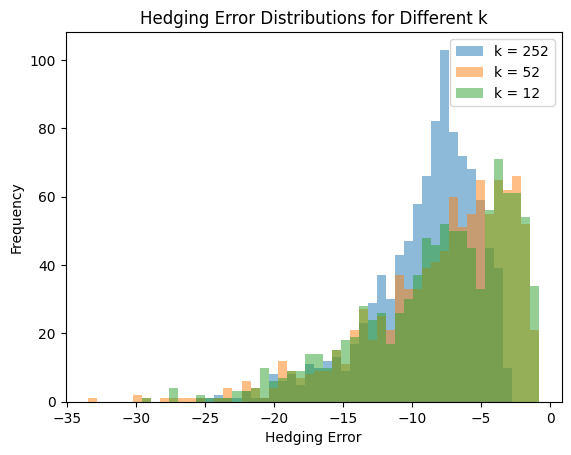

In [98]:
all_errors = []
for k in [252, 52, 12]:
    all_errors.extend(hedging_errors[k])

# Define consistent bins
min_err = min(all_errors)
max_err = max(all_errors)
bins = np.linspace(min_err, max_err, 51)  # 50 bins

# Plot
for k in [252, 52, 12]:
    plt.hist(hedging_errors[k], bins=bins, alpha=0.5, label=f"k = {k}", density=False)  # Optional: density
plt.xlabel("Hedging Error")
plt.ylabel("Frequency")
plt.legend()
plt.title("Hedging Error Distributions for Different k")
plt.show()

### Mismatched Volatility

In [99]:
# Parameters
K = 99
S0 = 100
r = 0.06
sigma = 0.2
T = 1
n = 1000  # simulation points
k = 252 # number of hedgings
dt = T / n

vols = [0.10, 0.15, 0.25, 0.30]

hedging_errors = {str(vol): {252: [], 52: [], 12: []} for vol in vols}

for vol in vols:
    for k in hedging_errors[str(vol)].keys():
        for _ in range(1000):
            S = euler_scheme(S0, r, vol, T, n)
            # We use a different vol for hedging: sigma = 0.2
            hedging_error, n_of_hedgings = dynamic_hedging(S, K, T, r, sigma, dt, n, k)
            hedging_errors[str(vol)][k].append(hedging_error)

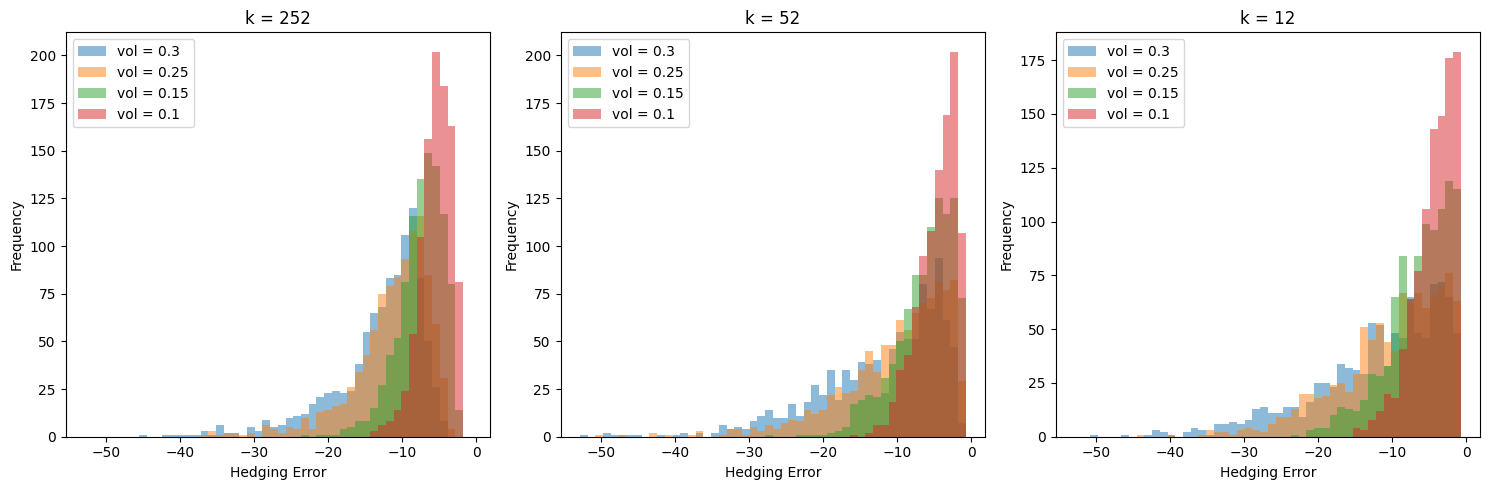

In [100]:
# Collect all errors into a single list to find global min and max
all_errors = []
for vol_errors in hedging_errors.values():
    for k_errors in vol_errors.values():
        all_errors.extend(k_errors)

min_err = min(all_errors)
max_err = max(all_errors)
bins = np.linspace(min_err, max_err, 51)  # 50 bins

plt.figure(figsize=(15, 5))
for i, k in enumerate([252, 52, 12]):
    plt.subplot(1, 3, i + 1)
    for vol in reversed(vols):
        plt.hist(hedging_errors[str(vol)][k], bins=bins, alpha=0.5,
                 label=f"vol = {vol}", density=False)  # Optional: density=True
    plt.title(f"k = {k}")
    plt.xlabel("Hedging Error")
    plt.ylabel("Frequency")
    plt.legend()
plt.tight_layout()
plt.show()